In [1]:
#2019/03/20 made for training. Full analysis of 4D and WFS data.
# Make sure to run all the import, then go to WFS section at bottom if you are onl 

%reset
%pylab
from pySurf.fit_cylinder import *
from pySurf.points import *
#from calibrate_align import *
from pyProfile.profile import polyfit_profile,level_profile
from pyProfile.psd import psd
from plotting.multiplots import compare_images
from dataIO.fn_add_subfix import fn_add_subfix
#from PSDanalysis import *
from pySurf.instrumentReader import matrix4D_reader
from pySurf.instrumentReader import points_reader

%load_ext autoreload
%autoreload 2


Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


ModuleNotFoundError: No module named 'pySurf.find_internal_rectangle'

In [41]:
%qtconsole


In [42]:
pwd


'C:\\Users\\Vincenzo\\Google Drive\\POOL\\PSD\\analysis_PSD'

In [43]:
from pySurf.psd2d import calculatePSD
from pySurf.psd2d import calculatePSD,plotPSDs,PSDplot
from pySurf.psd2d import psd2d, plot_psd2d,avgpsd2d
from utilities.imaging import fitting as fit
from pySurf.affine2D import find_rototrans, find_affine
from pySurf.data2D import crop_data,removelegendre,level_by_line,levellegendre,projection
from pyProfile.profile import save_profile

## Settings

In [44]:
plt.style.use(u'seaborn-colorblind')

In [45]:
#always run this
outfolder=r'results\C1S04_cut' #output 
plotTitle=os.path.basename(outfolder)

In [46]:
plt.close('all')

### 4D

In [47]:
infolder=r'C:\Users\Vincenzo\Google Drive\Shared by Vincenzo\Metrology logs and data\measure_data\4D_data\Metrology\C1S04\4D\180209_C1S04_cut2'

In [48]:
#for 09/21 measurements
ypix=None #0.127901442999 #mm  
ytox=220./200.  
zscale=None #0.6328
scale=(1000,-1000,0.001)
#Arealoc={5:(85,0),6:(111,0),7:(142,0),8:(38,0)}  #location of centers of scanned areas indexed with file #
wf=os.path.join(infolder,r'180209_01_C1S04_RefSub.csv')
#ff=os.path.join(infolder,r'171121_C2S04\171121_C2S04_Fiducials_RefSub.csv')

"""
ref=np.array([[25.02, 27.35],
[5.01, 21.67],
[10.00, -38.25],
[17.78, -51.56]])*(-1,1)
"""

#A 25.02, 27.35
#B 5.01, 21.67
#C -63.80, -9.42
#D 62.69, -23.94
#E 10.00, -38.25
#F 17.78, -51.56


'\nref=np.array([[25.02, 27.35],\n[5.01, 21.67],\n[10.00, -38.25],\n[17.78, -51.56]])*(-1,1)\n'

In [49]:
outfile=os.path.join(outfolder,os.path.basename(wf))

# skip this if not fiducials file

In [ ]:
#load and mark fiducials
wdata,x,y=matrix4D_reader(ff,ypix=ypix,ytox=ytox,zscale=zscale,scale=scale,center=(0,0)) #,crop=crop)
wdata=wdata-fit.fitConeMisalign(wdata)[0]
plt.figure(2)
plt.clf()
plt.imshow(wdata,extent=(span(x)[0],span(x)[1],span(y)[0],span(y)[1]),aspect='equal',origin='lower')
plt.grid()
plt.title(os.path.basename(ff))

plt.colorbar()
#plt.waitforbuttonpress()
display(plt.gcf())

In [ ]:

from plotting.add_clickable_markers import add_clickable_markers
try:
    del(f)
except NameError:
    pass
f=add_clickable_markers()


In [ ]:
print f.markers
m1=np.array(f.markers)

In [ ]:
#no fiducials on this run, so set the same and don't rotate
m1=np.array([[-22.197591521638955, 52.287308505612664], [34.976602822607845, 39.404854959643004], 
             [40.312915159955537, 10.436302271184232]])


In [ ]:
#use same coordinates as a trick
ref=np.array([[-22.197591521638955, 52.287308505612664], [34.976602822607845, 39.404854959643004], 
             [40.312915159955537, 10.436302271184232]])
#np.array([[-25.729465127215349, 43.331571386929248], [47.543004261442981, 41.213149412528466], 
#              [53.325774874742166, 16.481499648030677], [38.240782357147616, 4.5143611051155741]])

In [ ]:
from pySurf.distanceTable import distanceTable
print distanceTable(m1)
print distanceTable(ref)
print distanceTable(m1)-distanceTable(ref)

In [ ]:
plt.plot(m1[:,0],m1[:,1],'x')
display(plt.gcf())

In [ ]:
plt.figure()
for i in range(3):
    plt.plot(m1[i,0],m1[i,1],'x')
plt.gca().set_prop_cycle(None)
for i in range(3):
    plt.plot(ref[i,0],ref[i,1],'o')

In [ ]:
import logging
# create logger
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

# create console handler and set level to debug
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)

# create formatter
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')

# add formatter to ch
ch.setFormatter(formatter)

# add ch to logger
logger.addHandler(ch)

In [ ]:
trans=find_rototrans(m1,ref)

In [ ]:
m2=trans(m1)
plt.figure(3)
plt.clf()
plt.grid(1)
plt.gca().set_aspect('equal')
plt.plot(m1[:,0],m1[:,1],'o',label='fiducials')
plt.plot(ref[:,0],ref[:,1],'x',label='absolute position')
plt.plot(m2[:,0],m2[:,1],'+',label='transformed')

plt.legend(loc=0)
plt.show()
display(plt.gcf())

## reload real data (no masked fiducials)

C:\Users\Vincenzo\Google Drive\libraries\python\userKov3\pySurf\data2D.py:143: RuntimeWarning: invalid value encountered in greater
  data[((data>zrange[1]) | (data<zrange[0]))]=np.nan
C:\Users\Vincenzo\Google Drive\libraries\python\userKov3\pySurf\data2D.py:143: RuntimeWarning: invalid value encountered in less
  data[((data>zrange[1]) | (data<zrange[0]))]=np.nan


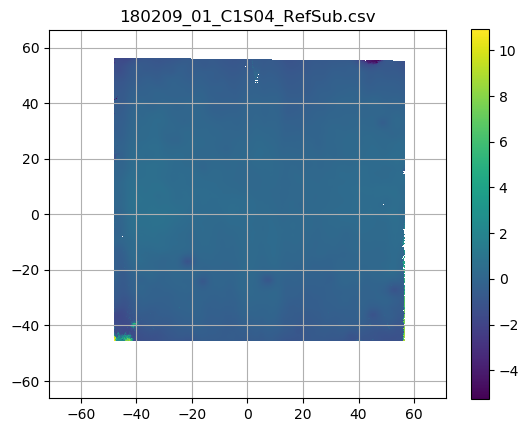

In [50]:

wdata,x,y=matrix4D_reader(wf,ypix=ypix,ytox=ytox,zscale=zscale,center=(0,0),scale=scale) #,crop=crop)
wdata=wdata-fit.fitConeMisalign(wdata)[0]
plt.clf()
plt.imshow(wdata,extent=(span(x)[0],span(x)[1],span(y)[0],span(y)[1]),aspect='equal',origin='lower')
plt.grid()
plt.title(os.path.basename(wf))

try:
    plt.plot(m1[:,0],m1[:,1],'xw')
except:
    pass

plt.colorbar()
#plt.waitforbuttonpress()
display(plt.gcf())

In [51]:
p2=matrix_to_points2(wdata,x,y)  #p2=trans(matrix_to_points2(wdata,x,y))

resampling...


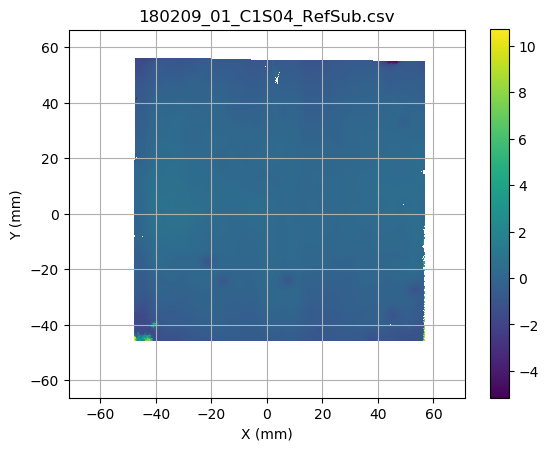

In [52]:
plt.clf()
plot_points(p2)
plt.grid(1)
plt.title(os.path.basename(wf))
display(plt.gcf())

In [54]:
plt.savefig(fn_add_subfix(outfile,'','.png'))
save_points(fn_add_subfix(outfile,'','.dat'),p2)
save_points(fn_add_subfix(outfile,'_matrix','.dat'),p2,matrix=1)

In [55]:
p2=level_points(crop_points(p2,[-47,56],[-45,54]),[-20,20],[-40,40]) #level using points on central region

resampling...


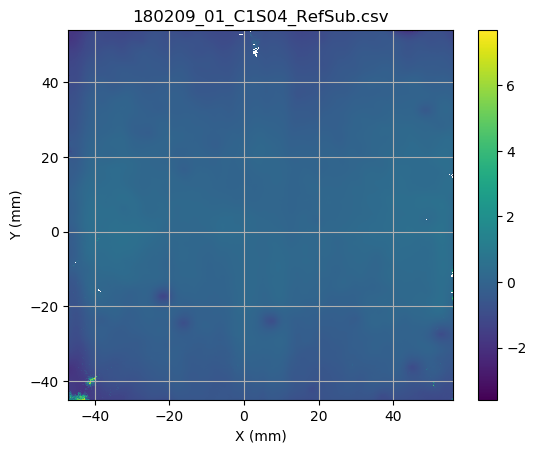

In [56]:
plt.figure()
plot_points(p2)
plt.grid(1)
plt.title(os.path.basename(wf))
display(plt.gcf())

In [57]:
print(np.nanstd(p2[:,2]))

0.41926054896591847


In [58]:
plt.savefig(fn_add_subfix(outfile,'_4in','.png'))
save_points(fn_add_subfix(outfile,'_4in','.dat'),p2)
save_points(fn_add_subfix(outfile,'_4in_matrix','.dat'),p2,matrix=1)

resampling...


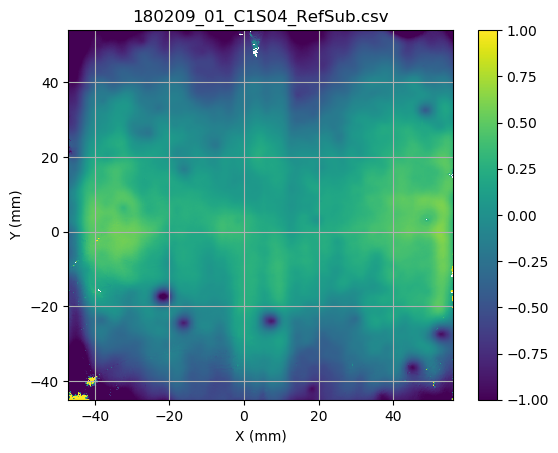

In [59]:
#plot on standard color scale
plt.figure()
plot_points(p2,vmin=-1,vmax=1)
plt.grid(1)
plt.title(os.path.basename(wf))
display(plt.gcf())

In [60]:
plt.savefig(fn_add_subfix(outfile,'_4in_stdcol','.png'))

## Legendre analysis, slopes and profiles on central strip

In [61]:
# alternative starting point
p2=get_points(fn_add_subfix(outfile,'_4in','.dat'),delimiter=' ')

In [62]:
p2=level_points(crop_points(p2)) #,[-11,11],[-30,30])) #level using points on central region

In [63]:
leg_deg=(10,10) #degrees for 2D legendre removal
misal_deg = (1,1)      #degrees for misalignment correction (1,2) for cone (this is applied after fit.)

resampling...


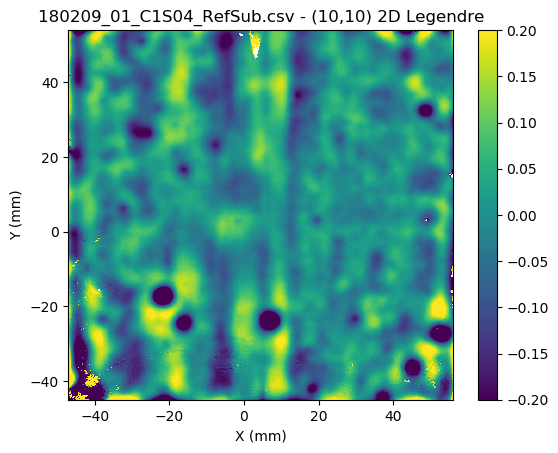

In [64]:
#legendre removed
wdata,x,y=points_autoresample(p2)
leg=fit.legendre2d(wdata,*leg_deg)
wdata2=wdata-leg[0]
x2,y2=x,y
plt.clf()
plot_points(matrix_to_points2(wdata2,x2,y2))
plt.title(os.path.basename(wf)+ ' - (%2i,%2i) 2D Legendre'%leg_deg)
plt.clim(-0.2,0.2)
display(plt.gcf())

In [65]:
plt.savefig(fn_add_subfix(outfile,'_4in_legendre','.png'))

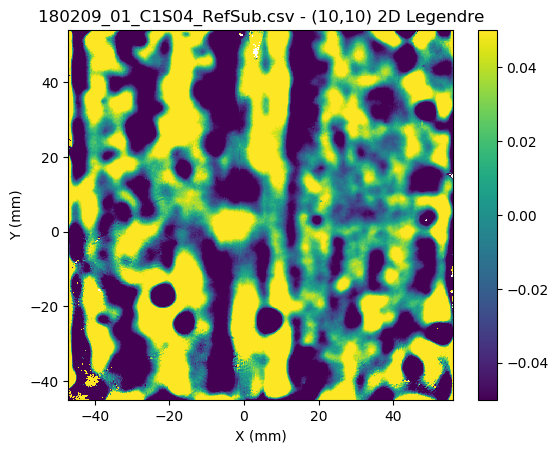

In [66]:
plt.clim([-0.05,0.05])
display(plt.gcf())
plt.savefig(fn_add_subfix(outfile,'_4in_legendre_smallclim','.png'))

In [67]:
print(np.nanstd(wdata2))
print(np.nanstd(leg[0]))

0.14068926030080922
0.3839592971243391


C:\Users\Vincenzo\Google Drive\libraries\python\userKov3\pySurf\data2D.py:445: RuntimeWarning: invalid value encountered in greater
  slopeax=np.where(np.logical_and(slopeax>srange[0],slopeax<srange[1]),slopeax,np.nan)
C:\Users\Vincenzo\Google Drive\libraries\python\userKov3\pySurf\data2D.py:445: RuntimeWarning: invalid value encountered in less
  slopeax=np.where(np.logical_and(slopeax>srange[0],slopeax<srange[1]),slopeax,np.nan)
C:\Users\Vincenzo\Google Drive\libraries\python\userKov3\pySurf\data2D.py:446: RuntimeWarning: invalid value encountered in greater
  slopeaz=np.where(np.logical_and(slopeaz>srange[0],slopeaz<srange[1]),slopeaz,np.nan)
C:\Users\Vincenzo\Google Drive\libraries\python\userKov3\pySurf\data2D.py:446: RuntimeWarning: invalid value encountered in less
  slopeaz=np.where(np.logical_and(slopeaz>srange[0],slopeaz<srange[1]),slopeaz,np.nan)


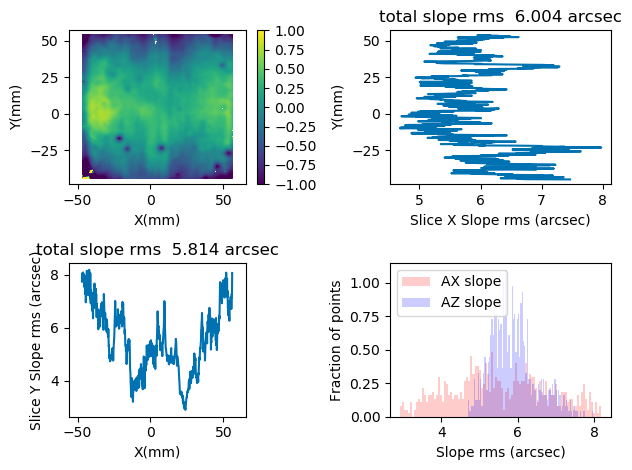

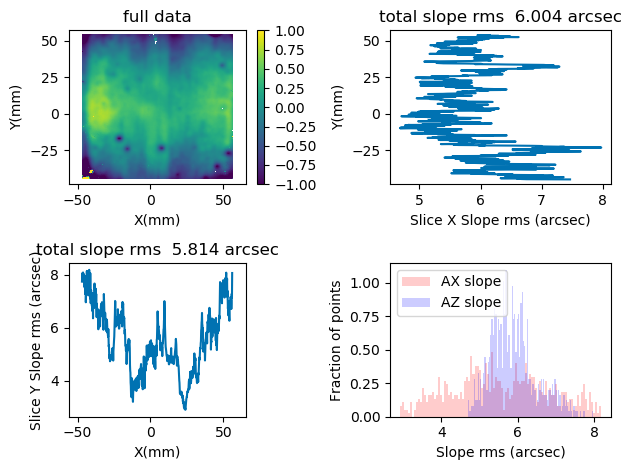

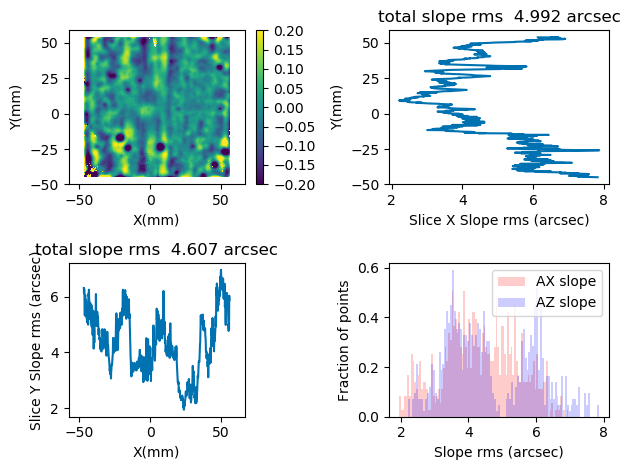

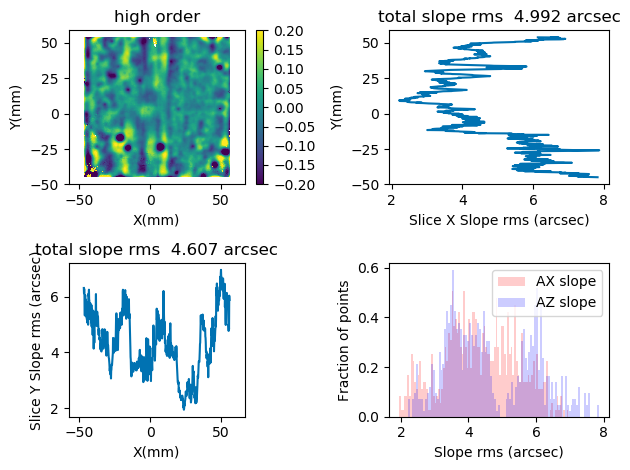

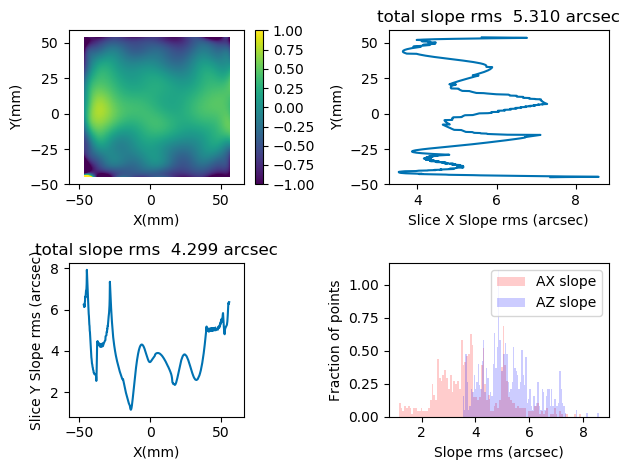

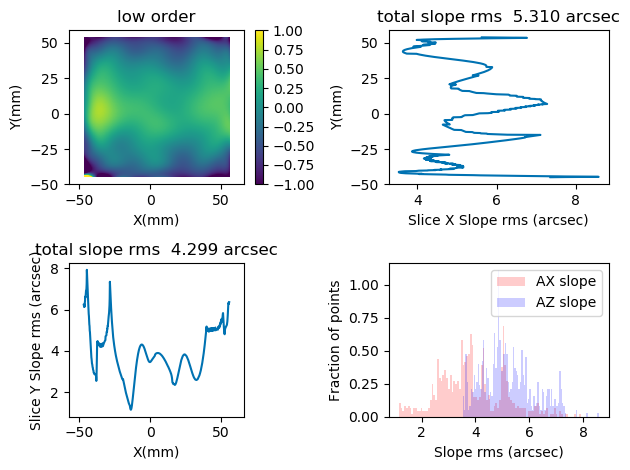

In [68]:
from pySurf.data2D import plot_slope_slice
plt.figure()
plot_slope_slice(wdata,x,y,scale=(1,1,1000),vrange=(-1,1),srange=(0,30),filter=True)[0].set_title('full data')
display(plt.gcf())
plot_slope_slice(wdata2,x2,y2,scale=(1,1,1000),vrange=(-0.2,0.2),srange=(0,30),filter=True)[0].set_title('high order')
display(plt.gcf())
plot_slope_slice(leg[0],x2,y2,scale=(1,1,1000),vrange=(-1,1),srange=(0,30),filter=True)[0].set_title('low order')
display(plt.gcf())

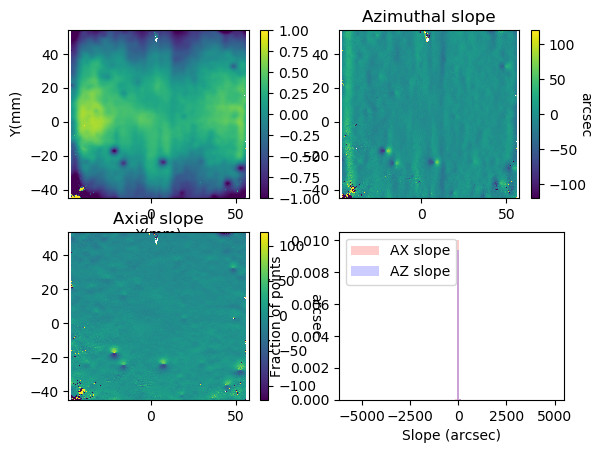

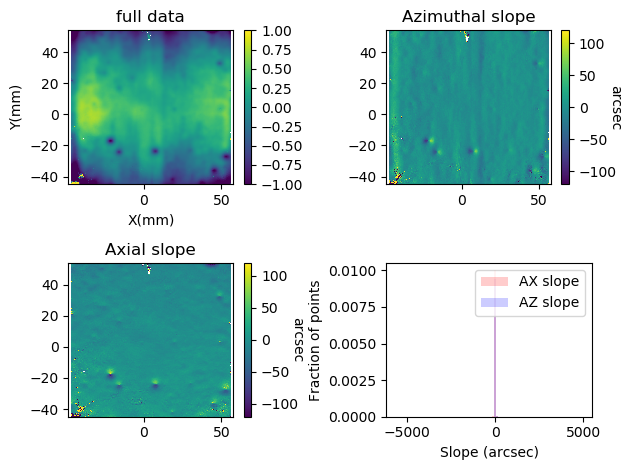

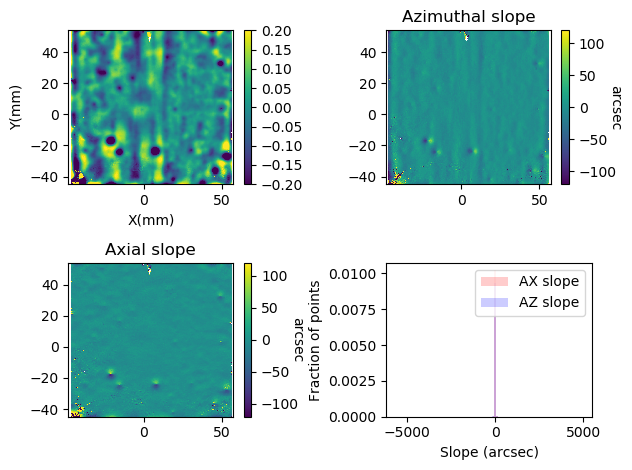

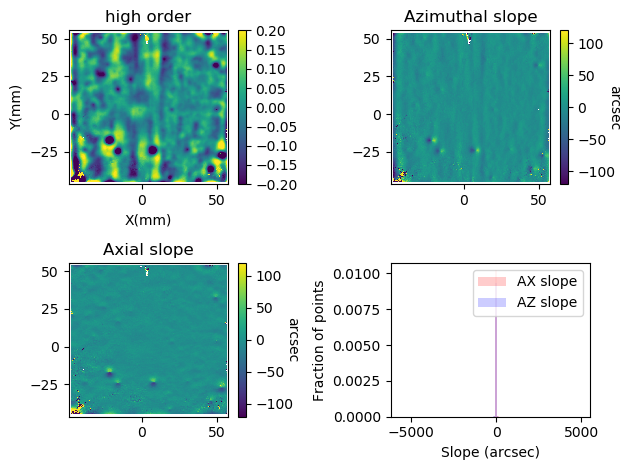

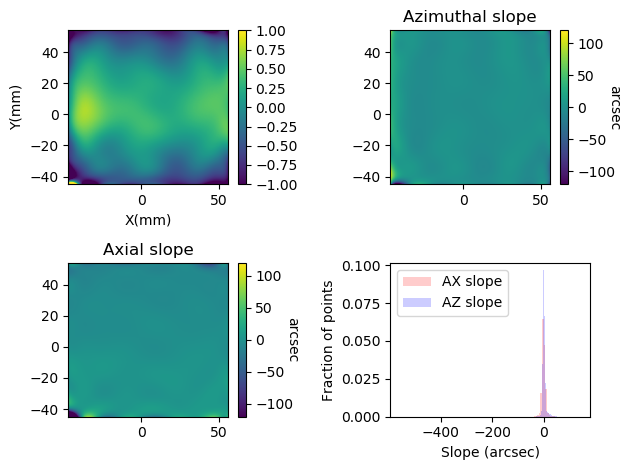

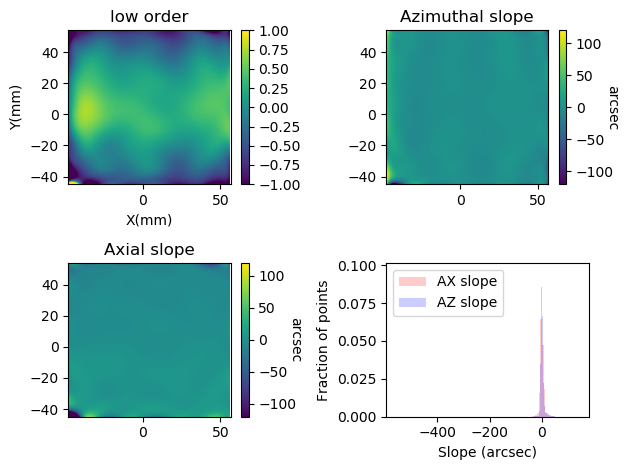

In [69]:
from pySurf.data2D import plot_slope_2D
plt.figure()
plot_slope_2D(wdata,x,y,scale=(1,1,1000),vrange=(-1,1),srange=(-120,120))[0].set_title('full data')
#plt.tight_layout()
display(plt.gcf())
plot_slope_2D(wdata2,x2,y2,scale=(1,1,1000),vrange=(-0.2,0.2),srange=(-120,120))[0].set_title('high order')
display(plt.gcf())
plot_slope_2D(leg[0],x2,y2,scale=(1,1,1000),vrange=(-1,1),srange=(-120,120))[0].set_title('low order')
display(plt.gcf())

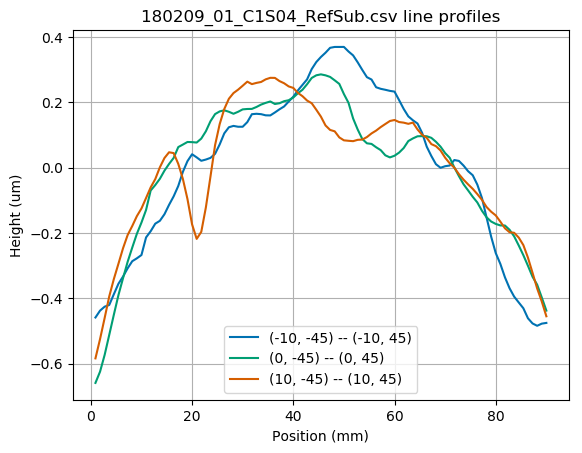

In [70]:
profiles=[((-10,-45),(-10,45)),((0,-45),(0,45)),((10,-45),(10,45))]

plt.figure()
plt.xlabel('Position (mm)')
plt.ylabel('Height (um)')
plt.title(os.path.basename(wf)+' line profiles')
plt.grid(1)

for p in profiles:
    pp0,pp1=p
    xp1,yp1=level_profile(*extract_profile(p2,pp0,pp1))
    plt.plot(xp1,yp1,label='%s -- %s'%(pp0,pp1))

plt.legend(loc=0)

display(plt.gcf())
plt.savefig(fn_add_subfix(outfile,'_profiles','.png'))

### sag removed

In [71]:
# alternative starting point
p2=get_points(fn_add_subfix(outfile,'_4in','.dat'),delimiter=' ')
#p2=level_points(crop_points(p2),[-11,11],[-30,30]) #level using points on central region

In [72]:
wdata,x,y=points_autoresample(p2)

resampling...


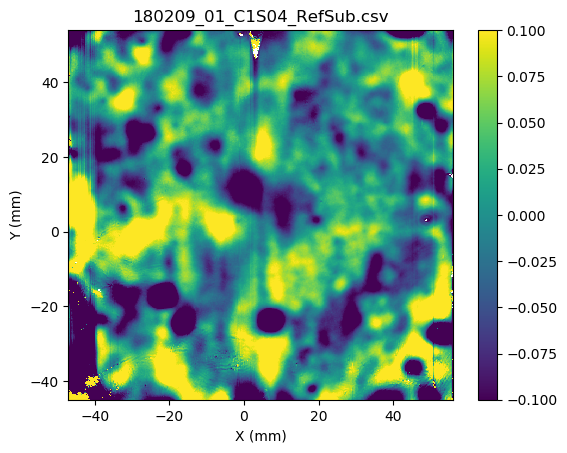

In [73]:
#sag removed
from pySurf.data2D import removesag
from pySurf.data2D import level_by_line,levellegendre

#wdata,x,y=points_autoresample(p2)
#leg=fit.legendre2d(wdata,1,2)
wdata2=levellegendre(y,wdata,2)  #removesag by line
x2,y2=x,y
p2=matrix_to_points2(wdata2,x2,y2)
plt.clf()
plot_points(p2)
plt.title(os.path.basename(wf))
plt.clim(-0.1,0.1)
display(plt.gcf())

In [74]:
plt.savefig(fn_add_subfix(outfile,'_4in_sagbyline','.png'))

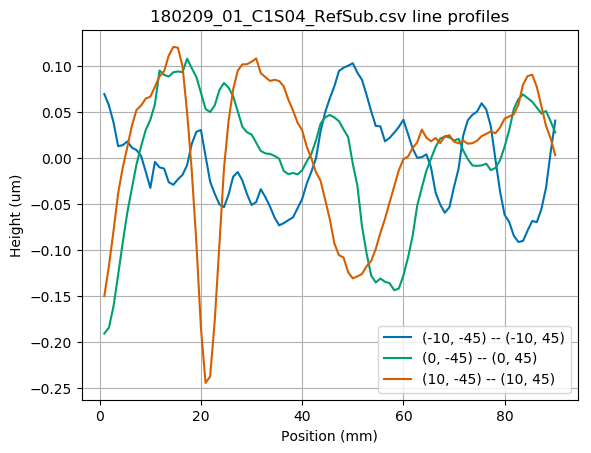

In [75]:
profiles=[((-10,-45),(-10,45)),((0,-45),(0,45)),((10,-45),(10,45))]

plt.figure()
plt.xlabel('Position (mm)')
plt.ylabel('Height (um)')
plt.title(os.path.basename(wf)+' line profiles')
plt.grid(1)

for p in profiles:
    pp0,pp1=p
    xp1,yp1=extract_profile(p2,pp0,pp1)
    plt.plot(xp1,yp1,label='%s -- %s'%(pp0,pp1))

plt.legend(loc=0)

display(plt.gcf())
plt.savefig(fn_add_subfix(outfile,'_profiles_sag','.png'))

## PSD

In [76]:
# alternative starting point
p2=get_points(fn_add_subfix(outfile,'_4in','.dat'),delimiter=' ')


In [89]:
crop=[-38,45],[-45,45]  #want to avoid bad data due to scratches
prange=np.array((1e-8,1.e-1))#np.array((5e-8,1.e-5))  #color scale of 2d psd plot
rmsrange=[[None,0.1],[0.1,1],[1,None]]  #range of frequency for rms calculation 
vrange_surf=([-0.5,0.5])  #color scale of surface map
vrange_leg=([-0.05,0.05])   #color scale of legendre removed map

In [90]:
plt.close('all')

In [91]:
from pySurf.data2D import crop_data
wdata,x,y=points_autoresample(p2)
wdata,x,y=crop_data(wdata,x,y,*crop) 

C:\Users\Vincenzo\Google Drive\libraries\python\userKov3\pySurf\data2D.py:143: RuntimeWarning: invalid value encountered in greater
  data[((data>zrange[1]) | (data<zrange[0]))]=np.nan
C:\Users\Vincenzo\Google Drive\libraries\python\userKov3\pySurf\data2D.py:143: RuntimeWarning: invalid value encountered in less
  data[((data>zrange[1]) | (data<zrange[0]))]=np.nan


resampling...


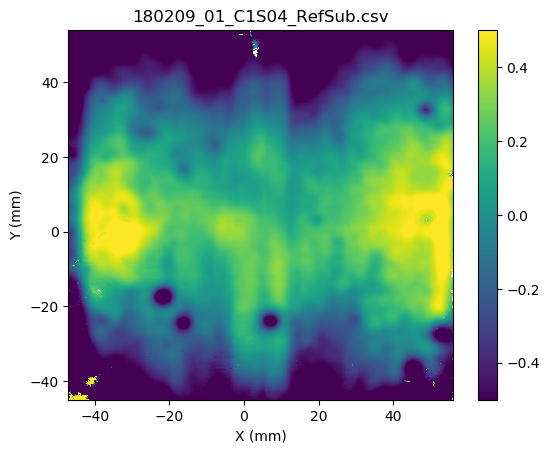

In [92]:
plt.figure()
plt.title(os.path.basename(wf))  
plot_points(p2,vmin=-0.5,vmax=0.5) #,vmin=-6,vmax=2)
display(plt.gcf())

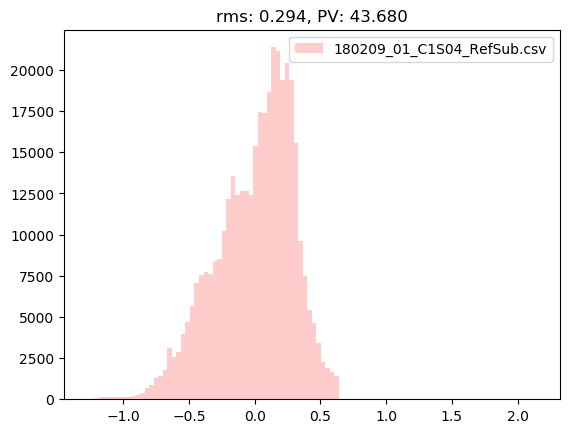

In [93]:
plt.figure()
tmp=level_points(crop_points(p2,*crop))
plt.hist(tmp[~np.isnan(tmp[:,2]),2],bins=100,label=os.path.basename(wf),alpha=0.2);
plt.title ('rms: %5.3f, PV: %5.3f'%(np.nanstd(tmp[:,2]),span(tmp[:2],1)))
plt.legend(loc=0)
wdata,x,y=points_autoresample(tmp)
display(plt.gcf())

freq. range [0.0:0.1]
freq. range [0.1:1.0]
freq. range [1.0:3.8]


C:\Anaconda2\envs\py36\lib\site-packages\matplotlib\colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


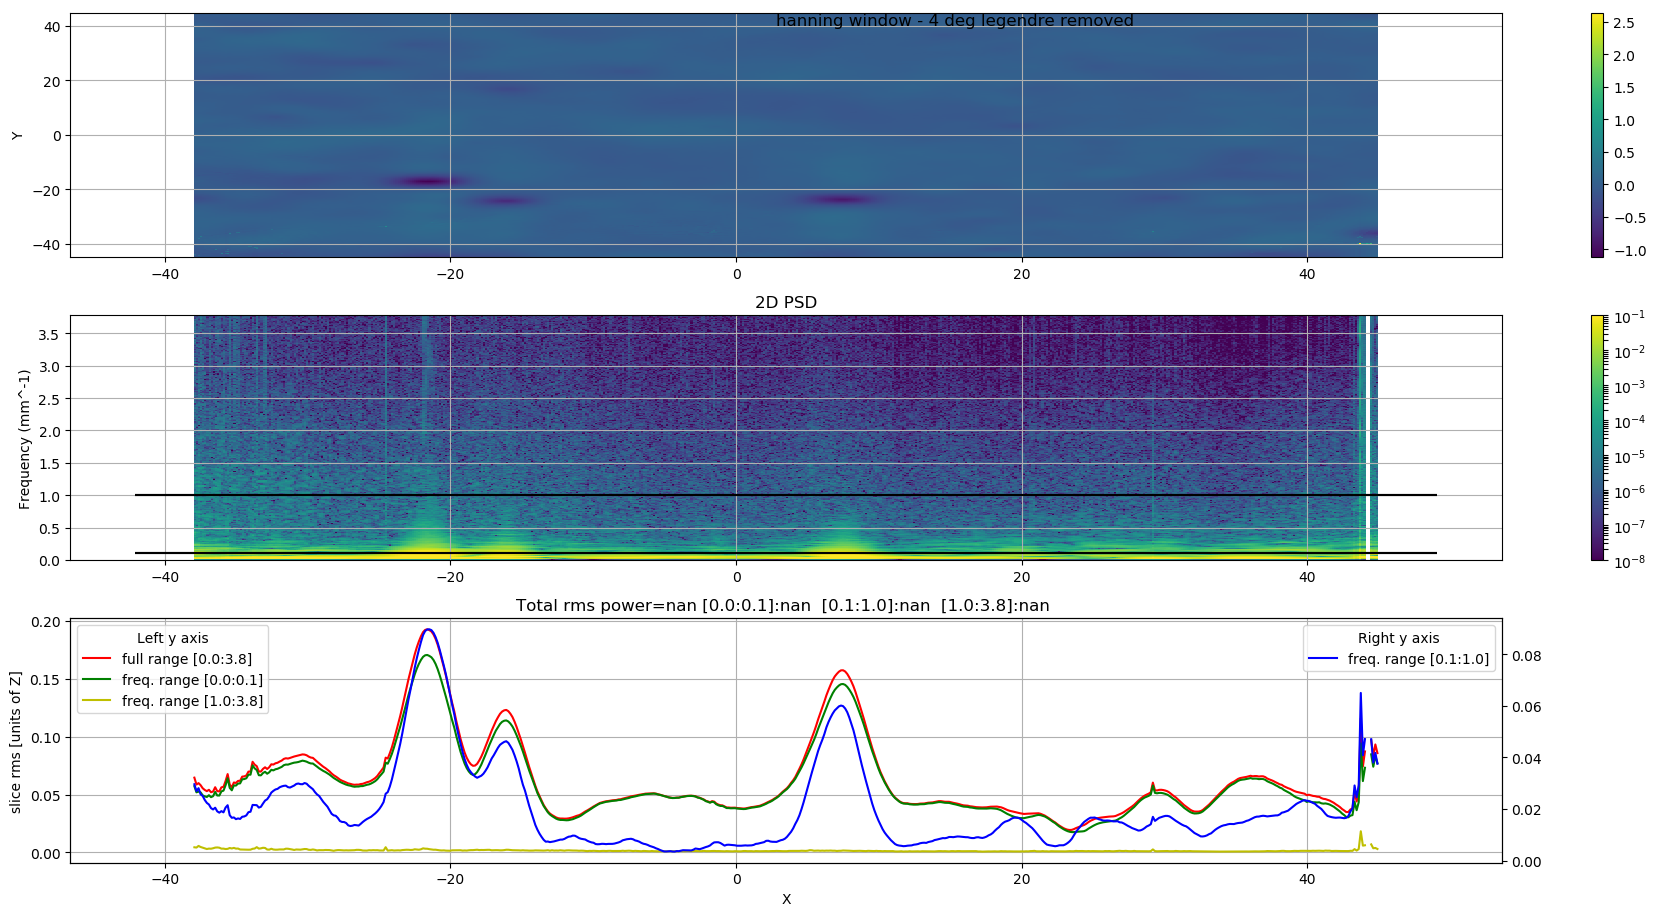

In [98]:
fs,ps=plot_psd2d(levellegendre(y,wdata,4),x,y,outname="",wfun=np.hanning,frange=rmsrange,prange=prange,ax2f=[0,1,0,0])
ptot=avgpsd2d(ps)
plt.suptitle('hanning window - 4 deg legendre removed')
plt.savefig(fn_add_subfix(outfile,'_full_psd2d','.png'))
display(plt.gcf())


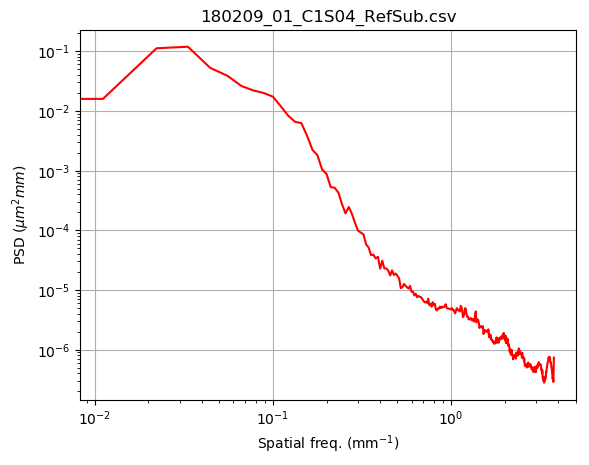

In [95]:

plt.figure()
plt.clf()
plt.loglog()

plt.plot(fs,np.nanmean(ps,axis=1),'r-')
plt.title(os.path.basename(wf))
plt.ylabel('PSD ($\mu m^{2} mm$)')
plt.xlabel('Spatial freq. (mm$^{-1}$)')
plt.grid()
display(plt.gcf())
plt.savefig(fn_add_subfix(outfile,'_psd','.png'))
save_profile(fn_add_subfix(outfile,'_psd','.dat'),fs,np.nanmean(ps,axis=1))

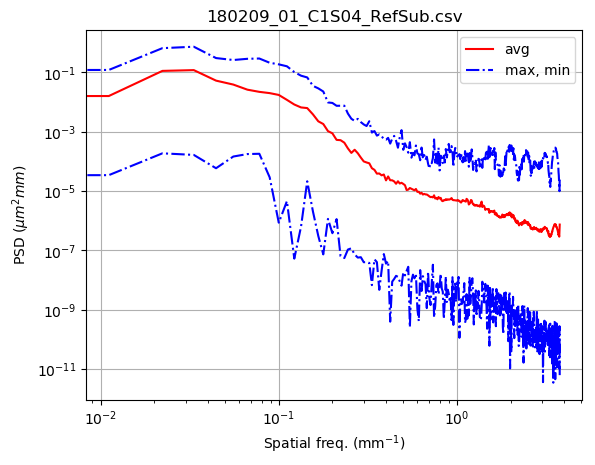

In [96]:

plt.figure()
plt.clf()
plt.loglog()
plt.title(os.path.basename(wf))
pa,pmin,pmax=projection(ps,axis=1,span=True)
plt.plot(fs,pa,'r-',label='avg')
plt.plot(fs,pmin,'b-.',label='max, min')
plt.plot(fs,pmax,'b-.')

plt.ylabel('PSD ($\mu m^{2} mm$)')
plt.xlabel('Spatial freq. (mm$^{-1}$)')
plt.legend(loc=0)
plt.grid()
display(plt.gcf())

plt.savefig(fn_add_subfix(outfile,'_psdrange','.png'))

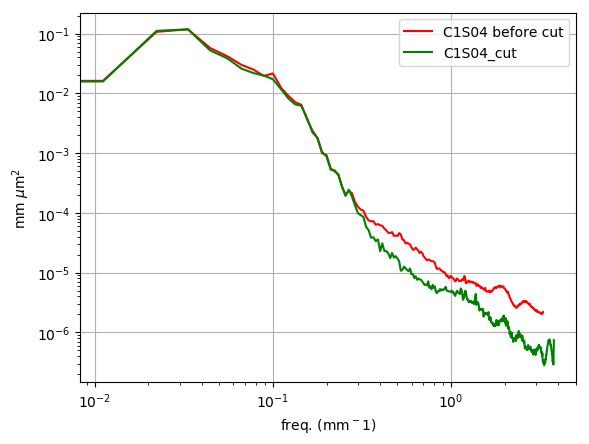

C:\Anaconda2\envs\py36\lib\site-packages\matplotlib\colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


In [97]:
from pyProfile.makenicePSDplots import make_plots
from collections import OrderedDict

pf2=[r'results\C1S04\180111_C1S04_RefSub_psd.dat',
     fn_add_subfix(outfile,'_psd','.dat')
    ]

l2=['C1S04 before cut',
    plotTitle]
    
#outfile=fn_add_subfix(ff,'_psdcomp','.png')
make_plots(OrderedDict(zip(pf2,l2))) #,outfile)

#plt.xlim((0.01,10))
#plt.ylim((1e-6,0.01))
display(plt.gcf())
plt.savefig(fn_add_subfix(outfile,'_psdcomp','.png'))


# END

## WFS

In [100]:
from pySurf.instrumentReader import fitsWFS_reader
from pySurf.affine2D import plot_transform,find_rototrans,find_affine
from pySurf.distanceTable import distanceTable

In [103]:

#get data from WFS measurement of PCO1S16
infolder=r'C:\Users\Vincenzo\Google Drive\Shared by Vincenzo\Metrology logs and data\measure_data\4D_data\Metrology\C1S04\WFS'
wf=os.path.join(infolder,r'180206_C1S04_GentexCut_Meas3.fits')

C:\Users\Vincenzo\Google Drive\libraries\python\userKov3\pySurf\data2D.py:143: RuntimeWarning: invalid value encountered in greater
  data[((data>zrange[1]) | (data<zrange[0]))]=np.nan
C:\Users\Vincenzo\Google Drive\libraries\python\userKov3\pySurf\data2D.py:143: RuntimeWarning: invalid value encountered in less
  data[((data>zrange[1]) | (data<zrange[0]))]=np.nan


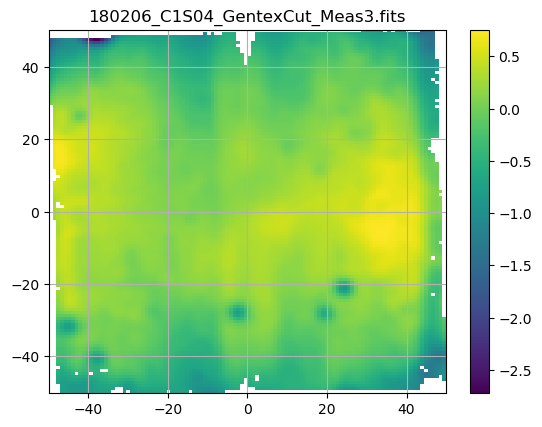

In [104]:
plt.figure(1)
plt.clf()
scale=101.6/120
wdata,x,y=fitsWFS_reader(wf,strip=1)
x=(x-span(x).sum()/2)*scale*220/200
y=(y-span(y).sum()/2)*scale
wdata=wdata-fit.fitConeMisalign(wdata)[0]
plt.clf()
plt.imshow(wdata,extent=(span(x)[0],span(x)[1],span(y)[0],span(y)[1]),aspect='auto')
plt.grid()
plt.title(os.path.basename(wf))

plt.colorbar()
#plt.waitforbuttonpress()
display(plt.gcf())

In [105]:
crop=([-50,50],[-50,50])
p1=level_points(crop_points(matrix_to_points2(wdata,x,y),*crop))
p1=p1[~np.isnan(p1[:,2]),:]
wdata,x,y=points_autoresample(p1)

In [106]:
outfilew=os.path.join(outfolder,os.path.basename(wf))
plt.savefig(fn_add_subfix(outfilew,'','.png'))
save_points(p1,fn_add_subfix(outfilew,'','.dat'))
save_points(p1,fn_add_subfix(outfilew,'_matrix','.dat'),matrix=1)

            the calling code. Corrected automatically for this time, but I will punish you waiting 5 seconds.
            the calling code. Corrected automatically for this time, but I will punish you waiting 5 seconds.


In [107]:
leg=fit.legendre2d(wdata,10,10)

wdata2=wdata-leg[0]
x2,y2=x[:],y[:]

resampling...


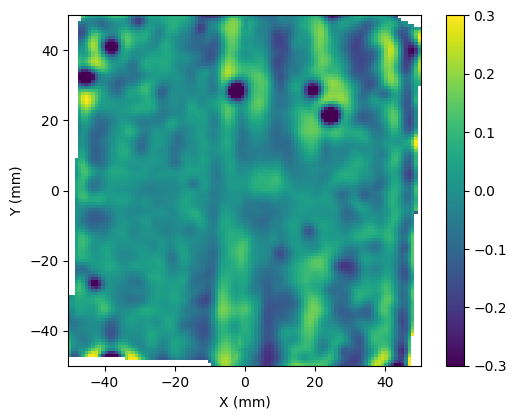

In [108]:
plt.figure(1)
plt.clf()
plot_points(matrix_to_points2(wdata2,x2,y2))
plt.clim([-0.3,0.3])
display(plt.gcf())

In [109]:
wdata,x,y=points_autoresample(p1)

freq. range [0.0:0.1]
freq. range [0.1:1.0]
freq. range [1.0:0.6]


C:\Anaconda2\envs\py36\lib\site-packages\matplotlib\colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


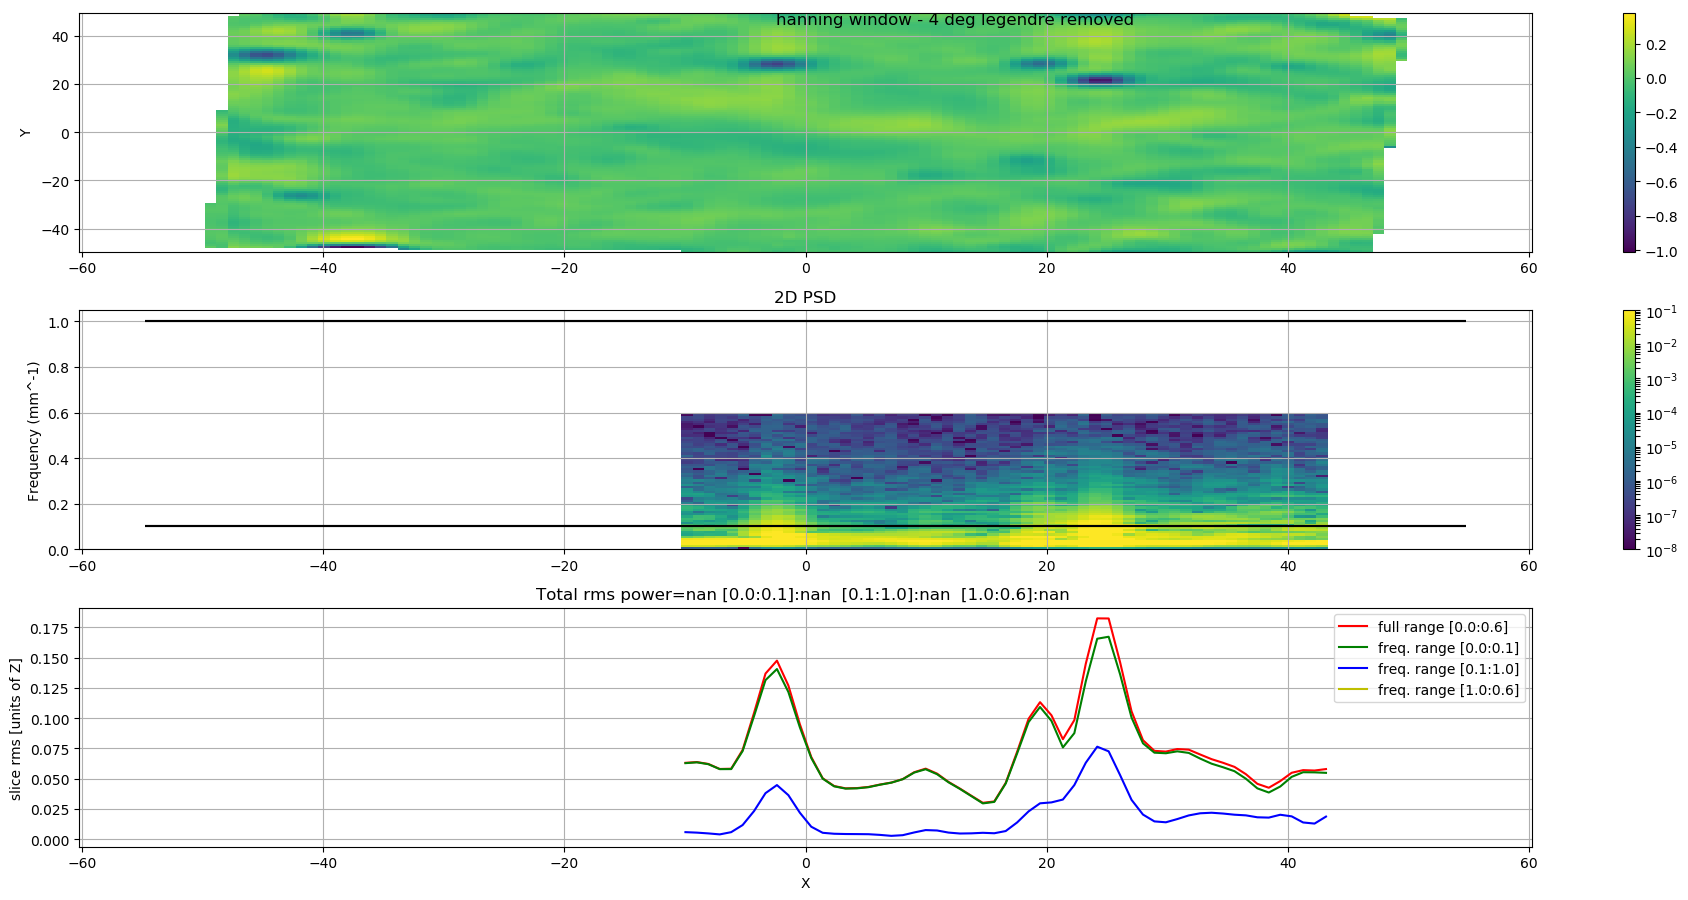

In [110]:
fs,ps=plot_psd2d(levellegendre(y,wdata,4),x,y,outname="",wfun=np.hanning,frange=rmsrange,prange=prange)
pa=avgpsd2d(ps)
plt.suptitle('hanning window - 4 deg legendre removed')
plt.savefig(fn_add_subfix(outfilew,'_full_psd2d','.png'))
display(plt.gcf())

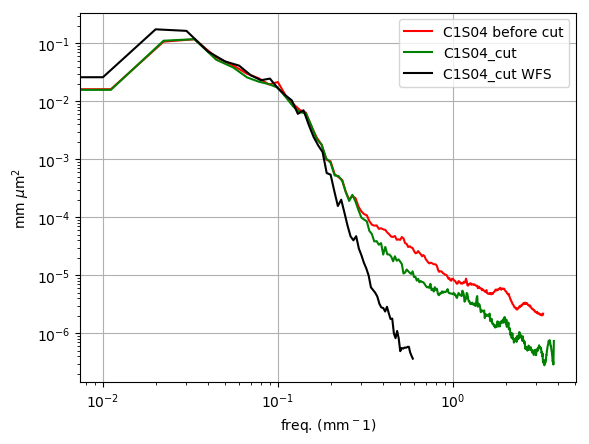

In [115]:
from pyProfile.makenicePSDplots import make_plots
from collections import OrderedDict

pf2=[r'results\C1S04\180111_C1S04_RefSub_psd.dat',
     fn_add_subfix(outfile,'_psd','.dat')
    ]

l2=['C1S04 before cut',
    plotTitle]
    
#outfile=fn_add_subfix(ff,'_psdcomp','.png')
make_plots(OrderedDict(zip(pf2,l2))) #,outfile)

#plot this profile
ll=os.path.basename(outfolder)
plt.plot(fs,pa,label=ll+' WFS',c='black')
plt.legend(loc=0)

#plt.xlim((0.01,10))
#plt.ylim((1e-6,0.01))
display(plt.gcf())
plt.savefig(fn_add_subfix(outfile,'_psdcompWFS','.png'))